# Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

#Tasks
Find the linear regression equation for this data.
Chart the original data and the equation on the chart.
Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [3]:
df.isnull().sum()

Chirps_Second         0
Ground_Temperature    0
dtype: int64

In [4]:
df.shape

(15, 2)

In [5]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
df=df.drop_duplicates()

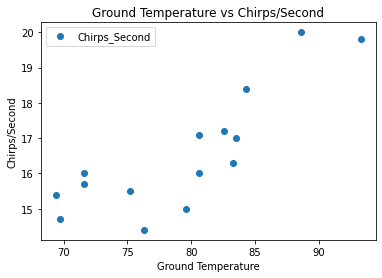

In [7]:
df.plot(x='Ground_Temperature', y='Chirps_Second', style='o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [8]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [9]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [10]:
X=df.loc[:,['Ground_Temperature']].values
y=df.loc[:,'Chirps_Second'].values

In [11]:
X

array([[88.6],
       [71.6],
       [93.3],
       [84.3],
       [80.6],
       [75.2],
       [69.7],
       [71.6],
       [69.4],
       [83.3],
       [79.6],
       [82.6],
       [80.6],
       [83.5],
       [76.3]])

In [12]:
y

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [13]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X, y) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [14]:
print(regressor.intercept_) # c

0.4593146452359598


In [15]:
print(regressor.coef_) # 

[0.20299973]


In [16]:
regressor.predict([[95]])

array([19.74428913])

In [17]:
y_pred = regressor.predict(X) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([18.44509085, 14.99409541, 19.39918959, 17.572192  , 16.821093  ,
       15.72489445, 14.60839592, 14.99409541, 14.547496  , 17.36919227,
       16.61809327, 17.22709246, 16.821093  , 17.40979222, 15.94819415])

In [18]:
pdf = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
pdf

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


In [19]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529147004


# Interpolate data

In [6]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df1 = pd.DataFrame(ground_cricket_data)
df1

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


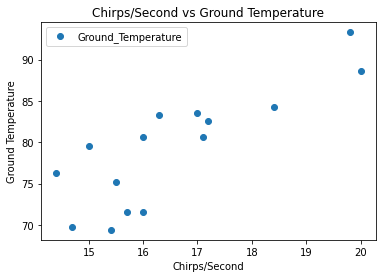

In [7]:
df1.plot(x='Chirps_Second', y='Ground_Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.ylabel('Ground Temperature')
plt.xlabel('Chirps/Second')
plt.show()

In [10]:
df1.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [13]:
y=df.loc[:,'Ground_Temperature'].values
X=df.loc[:,['Chirps_Second']].values

In [14]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X, y) 

LinearRegression()

In [15]:
print(regressor.intercept_) # c

22.848982308066887


In [16]:
print(regressor.coef_) # 

[3.410323]


In [17]:
regressor.predict([[18]])

array([84.2347963])

In [18]:
y_pred = regressor.predict(X) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([91.0554423, 77.4141503, 90.3733777, 85.5989255, 81.1655056,
       75.7089888, 72.9807304, 76.3910534, 75.3679565, 78.4372472,
       74.0038273, 81.5065379, 77.4141503, 80.8244733, 71.9576335])

In [19]:
pdf = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
pdf

,Actual,Predicted
0,88.6,91.055442
1,71.6,77.414150
2,93.3,90.373378
3,84.3,85.598925
4,80.6,81.165506
5,75.2,75.708989
6,69.7,72.980730
7,71.6,76.391053
8,69.4,75.367957
9,83.3,78.437247


In [20]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529147003
